# **Import Data**

#### Import library

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt

#### Import database

In [25]:
df_raw_train = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/train.csv')
df_raw_test = pd.read_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/test.csv')

df_raw_test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Pre-processing dataframe

#### Get values

In [7]:
train_images = df_raw_train.copy(deep = True)
train_label = train_images['label']
train_images = train_images.drop('label', axis=1)

test_images = df_raw_test.copy(deep = True)

#### Reshape data from 1D to 2D

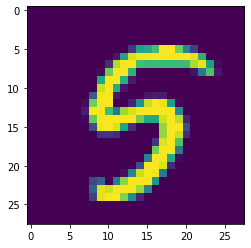

In [8]:
train_images = train_images.values.reshape(len(train_images),28,28,1)
test_images = test_images.values.reshape(len(test_images),28,28,1)

plt.imshow(train_images[8][:,:,0])

#### Normalize values (Gray Scale)

In [10]:
train_images = train_images/255.0
test_images = test_images/255.0

# **Machine Learning**

In [11]:
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.2.0


## Create Model

In [12]:
# Only chose onve value from range in filter
# Pick best values from kernel size

def build_model(hp):
    model = keras.Sequential([
        keras.layers.Conv2D(
            filters = hp.Int('conv_1_filter', min_value = 32, max_value = 128, step = 16),   
            kernel_size = hp.Choice('conv_1_kernel', values = [3,5,7]),                
            activation = 'relu',
            input_shape = (28,28,1)                                                    
        ),
         keras.layers.Conv2D(
            filters = hp.Int('conv_2_filter', min_value = 32, max_value = 128, step = 16),
            kernel_size = hp.Choice('conv_2_kernel', values = [3,5,7]),
            activation = 'relu'
         ),
         keras.layers.Flatten(),
         keras.layers.Dense(
             units = hp.Int('dense_1_units', min_value = 32, max_value = 128, step = 16),
             activation = 'relu'
             ),
        keras.layers.Dense(10, activation = 'softmax')     
        ])
    model.compile(optimizer = keras.optimizers.Adam(hp.Choice('learning_rate', values = [1e-2, 1e-3])),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
  
    return model

#### Fine Tuning

In [13]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search = RandomSearch(build_model, max_trials = 5, objective = 'val_accuracy')

#### Pre training

In [15]:
#  Number of tries and hyperparameters used (More tries, more time)

tuner_search.search(train_images, train_label, epochs=3, validation_split=0.1, verbose=2)

Epoch 1/3
1182/1182 - 17s - loss: 0.2037 - accuracy: 0.9406 - val_loss: 0.1096 - val_accuracy: 0.9643
Epoch 2/3
1182/1182 - 17s - loss: 0.0997 - accuracy: 0.9699 - val_loss: 0.1270 - val_accuracy: 0.9660
Epoch 3/3
1182/1182 - 16s - loss: 0.0813 - accuracy: 0.9762 - val_loss: 0.0819 - val_accuracy: 0.9760


Epoch 1/3
1182/1182 - 20s - loss: 0.1264 - accuracy: 0.9616 - val_loss: 0.0598 - val_accuracy: 0.9821
Epoch 2/3
1182/1182 - 19s - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0677 - val_accuracy: 0.9810
Epoch 3/3
1182/1182 - 19s - loss: 0.0282 - accuracy: 0.9920 - val_loss: 0.0587 - val_accuracy: 0.9833


Epoch 1/3
1182/1182 - 15s - loss: 0.1458 - accuracy: 0.9562 - val_loss: 0.0738 - val_accuracy: 0.9783
Epoch 2/3
1182/1182 - 14s - loss: 0.0449 - accuracy: 0.9856 - val_loss: 0.0472 - val_accuracy: 0.9843
Epoch 3/3
1182/1182 - 14s - loss: 0.0286 - accuracy: 0.9910 - val_loss: 0.0500 - val_accuracy: 0.9848


Epoch 1/3
1182/1182 - 22s - loss: 0.2027 - accuracy: 0.9439 - val_loss: 0.1461 - val_accuracy: 0.9617
Epoch 2/3
1182/1182 - 22s - loss: 0.0959 - accuracy: 0.9718 - val_loss: 0.1097 - val_accuracy: 0.9676
Epoch 3/3
1182/1182 - 22s - loss: 0.0865 - accuracy: 0.9744 - val_loss: 0.0864 - val_accuracy: 0.9752


Epoch 1/3
1182/1182 - 18s - loss: 0.1237 - accuracy: 0.9623 - val_loss: 0.0561 - val_accuracy: 0.9824
Epoch 2/3
1182/1182 - 18s - loss: 0.0401 - accuracy: 0.9875 - val_loss: 0.0386 - val_accuracy: 0.9876
Epoch 3/3
1182/1182 - 18s - loss: 0.0242 - accuracy: 0.9919 - val_loss: 0.0501 - val_accuracy: 0.9845


INFO:tensorflow:Oracle triggered exit


#### Build model with best hyperparameters

In [17]:
model = tuner_search.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 112)       1120      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 48)        134448    
_________________________________________________________________
flatten (Flatten)            (None, 23232)             0         
_________________________________________________________________
dense (Dense)                (None, 96)                2230368   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                970       
Total params: 2,366,906
Trainable params: 2,366,906
Non-trainable params: 0
_________________________________________________________________


#### Train model

In [19]:
model.fit(train_images, train_label, epochs=10, initial_epoch=0, validation_split=0.1, verbose=2)

Epoch 2/10
1182/1182 - 18s - loss: 0.0240 - accuracy: 0.9920 - val_loss: 0.0471 - val_accuracy: 0.9869
Epoch 3/10
1182/1182 - 18s - loss: 0.0165 - accuracy: 0.9946 - val_loss: 0.0408 - val_accuracy: 0.9876
Epoch 4/10
1182/1182 - 18s - loss: 0.0135 - accuracy: 0.9952 - val_loss: 0.0655 - val_accuracy: 0.9833
Epoch 5/10
1182/1182 - 18s - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.0454 - val_accuracy: 0.9886
Epoch 6/10
1182/1182 - 18s - loss: 0.0092 - accuracy: 0.9966 - val_loss: 0.0486 - val_accuracy: 0.9876
Epoch 7/10
1182/1182 - 18s - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.0623 - val_accuracy: 0.9881
Epoch 8/10
1182/1182 - 18s - loss: 0.0047 - accuracy: 0.9987 - val_loss: 0.0557 - val_accuracy: 0.9890
Epoch 9/10
1182/1182 - 18s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0539 - val_accuracy: 0.9876
Epoch 10/10
1182/1182 - 17s - loss: 0.0057 - accuracy: 0.9981 - val_loss: 0.0836 - val_accuracy: 0.9874


#### Predict

In [36]:
label_test = model.predict(test_images, batch_size=200)

In [50]:
label_pred = pd.DataFrame(label_test)
label_pred = pd.DataFrame(label_pred.idxmax(axis = 1))

In [51]:
kaggle_columns = ['ImageId', 'Label']
kaggle_submission = pd.DataFrame(columns = kaggle_columns)

kaggle_submission['ImageId'] = range(1, len(df_raw_test) + 1)
kaggle_submission['Label'] = label_pred

kaggle_submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [52]:
kaggle_submission.to_csv('C:/Users/Rafael/Code/Projetos/Kaggle/Digit Recognizer/Kaggle_submission.csv', index = False)